[0.4706394586349972, 0.5855057068907299, 0.6170891887990464, 0.6038889036220324, 0.5321653055159283]


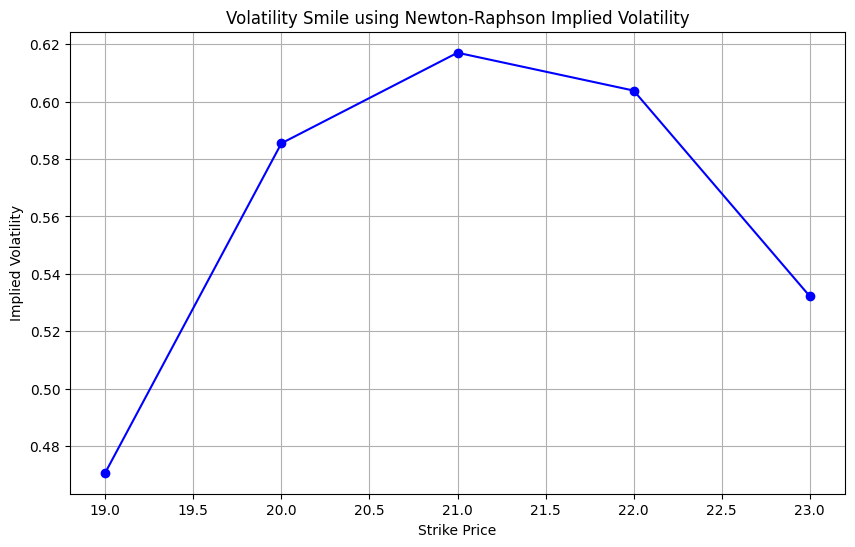

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 20          # Current stock price
K = np.array([19, 20, 21, 22, 23])  # Strike prices
rf = 0.08        # Risk-free rate (8%)
T = 1 / 12       # Time to maturity in years (1 month)
target_prices = [1.71, 1.41, 1.06, 0.71, 0.35]  # Hypothetical market prices for each strike

# Black-Scholes formula for call option price
def black_scholes_call(S0, K, T, rf, sigma):
    d1 = (np.log(S0 / K) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-rf * T) * norm.cdf(d2)
    return call_price

# Vega function, derivative of call price with respect to sigma
def vega(S0, K, T, rf, sigma):
    d1 = (np.log(S0 / K) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S0 * norm.pdf(d1) * np.sqrt(T)

# Newton-Raphson method for implied volatility
def newton_raphson_iv(S0, K, T, rf, market_price, tol=1e-9, max_iter=100):
    sigma = 0.2  # Initial guess for volatility
    for i in range(max_iter):
        price = black_scholes_call(S0, K, T, rf, sigma)
        diff = price - market_price  # Difference between BS price and market price
        
        if abs(diff) < tol:
            return sigma
        
        v = vega(S0, K, T, rf, sigma)
        sigma -= diff / v  # Newton-Raphson update
    
    return sigma  # Return the last sigma if convergence not reached

# Calculate implied volatilities for each strike
implied_vols = [newton_raphson_iv(S0, k, T, rf, mp) for k, mp in zip(K, target_prices)]

print(implied_vols)

# Plot the volatility smile
plt.figure(figsize=(10, 6))
plt.plot(K, implied_vols, marker='o', linestyle='-', color='b')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile using Newton-Raphson Implied Volatility')
plt.grid(True)
plt.show()

Implied Volatilities: [0.9990518926445653, 0.6436634323086161, 0.22129269656427614, -0.004542102637248968, 52.30061837196344]


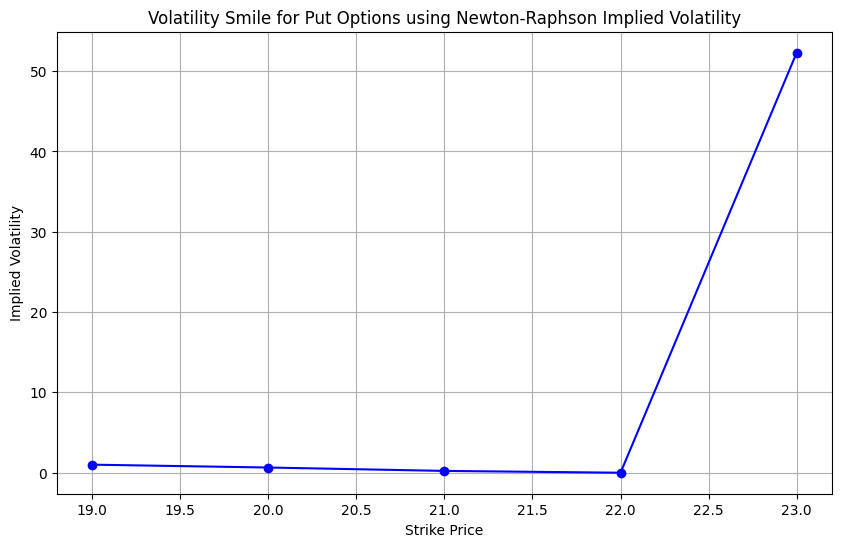

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 20          # Current stock price
K = np.array([19, 20, 21, 22, 23])  # Strike prices
rf = 0.08        # Risk-free rate (8%)
T = 1 / 12       # Time to maturity in years (1 month)
target_prices = [1.71, 1.41, 1.06, 0.71, 0.35]  # Hypothetical market prices for each strike

# Black-Scholes formula for put option price
def black_scholes_put(S0, K, T, rf, sigma):
    d1 = (np.log(S0 / K) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-rf * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

# Vega function, derivative of put price with respect to sigma
def vega(S0, K, T, rf, sigma):
    d1 = (np.log(S0 / K) + (rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S0 * norm.pdf(d1) * np.sqrt(T)

# Newton-Raphson method for implied volatility for put option
def newton_raphson_iv(S0, K, T, rf, market_price, tol=1e-9, max_iter=100):
    sigma = 0.2  # Initial guess for volatility
    for i in range(max_iter):
        price = black_scholes_put(S0, K, T, rf, sigma)
        diff = price - market_price  # Difference between BS price and market price
        
        if abs(diff) < tol:
            return sigma
        
        v = vega(S0, K, T, rf, sigma)
        if v < 1e-6:  # Threshold to prevent division by very small numbers
            return sigma
        
        sigma -= diff / v  # Newton-Raphson update
    
    return sigma  # Return the last sigma if convergence not reached

# Calculate implied volatilities for each strike
implied_vols = [newton_raphson_iv(S0, k, T, rf, mp) for k, mp in zip(K, target_prices)]

print("Implied Volatilities:", implied_vols)

# Plot the volatility smile
plt.figure(figsize=(10, 6))
plt.plot(K, implied_vols, marker='o', linestyle='-', color='b')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile for Put Options using Newton-Raphson Implied Volatility')
plt.grid(True)
plt.show()


